

## 1. What is Transfer Learning?

**Transfer Learning** is a technique where a model trained on one large task is **reused and adapted** for a new, related task.

Instead of training from scratch, we **transfer knowledge**.

📌 In deep learning, this usually means:

> Using a **pretrained model** (e.g., trained on ImageNet) and adapting it to your dataset.

---

## 2. Why Transfer Learning Is Used

Training deep neural networks from scratch needs:

* Huge datasets
* High computational power
* Long training time

### Transfer learning helps because:

✅ Learns faster
✅ Needs less data
✅ Gives higher accuracy
✅ Reduces overfitting
✅ Saves computation cost

That’s why it’s a **default choice in modern deep learning**.

---

## 3. Where Transfer Learning Is Used

### Computer Vision

* Image classification
* Object detection
* Medical imaging
* Face recognition

### NLP

* BERT, GPT, RoBERTa fine-tuning
* Text classification
* Question answering

### Speech

* Speaker recognition
* Speech-to-text

### Real-World Systems

* Autonomous vehicles
* Surveillance
* Healthcare AI
* Recommendation systems

---

## 4. How Transfer Learning Works (Core Idea)

A deep model learns features hierarchically:

| Layers        | Learn                            |
| ------------- | -------------------------------- |
| Early layers  | Generic features (edges, colors) |
| Middle layers | Shapes, textures                 |
| Deep layers   | Task-specific patterns           |

Transfer learning **reuses early & middle layers** and adapts the last layers.

---

## 5. Types / Ways of Transfer Learning

### 🔹 Way 1: Feature Extraction (Beginner Level)

📌 **Best when dataset is very small**

#### How it works:

* Load pretrained model
* Freeze all convolution layers
* Replace classifier head
* Train only new dense layers

```python
base_model.trainable = False
```

✅ Fast
✅ Low overfitting
❌ Limited performance ceiling

---

### 🔹 Way 2: Fine-Tuning (Intermediate Level)

📌 **Best when dataset is medium-sized**

#### How it works:

* Freeze early layers
* Unfreeze top layers
* Train with **small learning rate**

```python
for layer in base_model.layers[:-30]:
    layer.trainable = False
```

✅ Higher accuracy
✅ Better adaptation
⚠️ Needs careful learning rate

---

### 🔹 Way 3: Full Fine-Tuning (Advanced)

📌 **Best when dataset is large & similar**

* Unfreeze entire model
* Very small LR
* Strong regularization

⚠️ Risk of overfitting
⚠️ Computationally expensive

---

## 6. Transfer Learning Training Schema (Best Practice)

### Phase 1 — Feature Extraction

* Freeze backbone
* Train classifier head
* High LR (e.g., 1e-3)

### Phase 2 — Fine-Tuning

* Unfreeze top layers
* Small LR (1e-5)
* Add callbacks

### Phase 3 — Evaluation

* Precision, Recall, AUC
* Confusion matrix

---

## 7. Transfer Learning vs Training from Scratch

| Aspect        | Transfer Learning | From Scratch |
| ------------- | ----------------- | ------------ |
| Data required | Small             | Very large   |
| Training time | Short             | Long         |
| Accuracy      | High              | Often lower  |
| Overfitting   | Less              | More         |
| Compute cost  | Low               | High         |

---

## 8. Choosing the Right Pretrained Model

| Use Case        | Recommended Model |
| --------------- | ----------------- |
| Mobile / Edge   | MobileNet         |
| Best accuracy   | EfficientNet      |
| Deep features   | ResNet            |
| Speed           | Inception         |
| Medical imaging | ResNet / DenseNet |

---

## 9. Transfer Learning + ImageNet

Most CNN pretrained models are trained on **ImageNet**:

* ~1.2M training images
* 1,000 classes
* Rich real-world diversity

This makes learned features **generic and transferable**.

---

## 10. Advanced Transfer Learning Techniques 🚀

### 🔹 1. Progressive Unfreezing

Unfreeze layers gradually (top → bottom).

### 🔹 2. Discriminative Learning Rates

Different LR for different layers.

### 🔹 3. Domain Adaptation

When source and target domains differ significantly.

### 🔹 4. Self-Supervised Pretraining

Pretrain without labels (SimCLR, MoCo).

### 🔹 5. Knowledge Distillation

Transfer knowledge from large model to small model.

---

## 11. Common Mistakes to Avoid

❌ Using large LR during fine-tuning
❌ Augmenting validation/test data
❌ Unfreezing too many layers early
❌ Ignoring class imbalance

---

## 12. When Transfer Learning May NOT Help

* Very different domains (e.g., medical → satellite)
* Extremely large custom dataset
* Task unrelated to original training data




## 14. One-Line Intuition

> Transfer learning is like using a graduate’s knowledge instead of teaching from kindergarten again.




In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
100% 1.06G/1.06G [00:12<00:00, 308MB/s]
100% 1.06G/1.06G [00:12<00:00, 89.4MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [13]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [14]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
conv_base.trainable = False

In [16]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.8493 - loss: 0.3686 - val_accuracy: 0.9096 - val_loss: 0.2114
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9187 - loss: 0.1914 - val_accuracy: 0.9152 - val_loss: 0.1978
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9336 - loss: 0.1663 - val_accuracy: 0.9064 - val_loss: 0.2204
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9423 - loss: 0.1415 - val_accuracy: 0.9156 - val_loss: 0.2047
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9532 - loss: 0.1180 - val_accuracy: 0.9182 - val_loss: 0.2070
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9597 - loss: 0.1008 - val_accuracy: 0.9152 - val_loss: 0.2284
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9695 - loss: 0.0778 - val_accuracy: 0.9116 - val_loss: 0.2603
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9824 - loss: 0

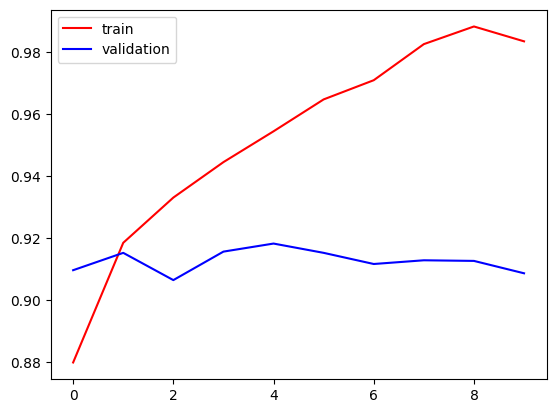

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

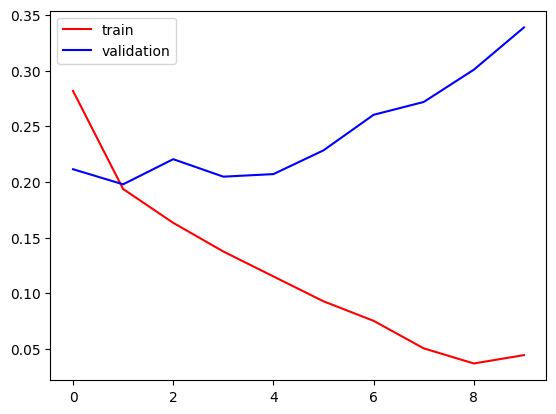

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()